#Kisore Senthilkumar 50610194

PROBLEM STATEMENT: ANALYSIS OF GENRES IMPACT ON THE RATING OF THE GAME BEING POSITIVE OR NOT

In [272]:
from ast import literal_eval
import itertools
import time
import re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from warnings import simplefilter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score,auc
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

pd.options.display.max_columns=100

#Why logisitic regression is not suitable

Generally when a binary classification problem is presented to us, it is assumed that Logistic Regression is a relevant model and especially when you have an outcome that is binary as well (Whether rating is positive or negative in our case). But in this specific case it falls because of a few factors. It has been analyzed in the upcoming steps.

In [273]:
df = pd.read_csv('cleaned_data.csv', engine='python', encoding='utf-8')
df=df[['is_action','is_indie','is_casual','is_strat','is_rpg','is_adv','is_f2p','is_sim','is_ra','is_sports','is_mmo','rnum','rval']]
ds=df[['is_action','is_indie','is_casual','is_strat','is_rpg','is_adv','is_f2p','is_sim','is_ra','is_sports','is_mmo','rval']]

In [284]:
X = ds.drop(columns=['rval'])
y = ds['rval']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
scores = cross_val_score(log_reg, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8120036934441367
Confusion Matrix:
[[   0 1018]
 [   0 4397]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1018
           1       0.81      1.00      0.90      4397

    accuracy                           0.81      5415
   macro avg       0.41      0.50      0.45      5415
weighted avg       0.66      0.81      0.73      5415

Cross-validation scores: [0.80978763 0.80960295 0.80960295 0.80960295 0.80960295]
Mean cross-validation score: 0.8096398891966758


Although the Accuracy of the prediction is 80% we must look into how the precision and recall are. The precision hitting 0 implies a serious flaw in the usage of this algorithm. Following visualization of the Correlation, ROC Curve and Confusion matrices further reinforce the conclusion that Logistic Regression isnt suitable for this problem. Hence we will proceed to other algorithms namely, RandomForestClassifier and XGBoost

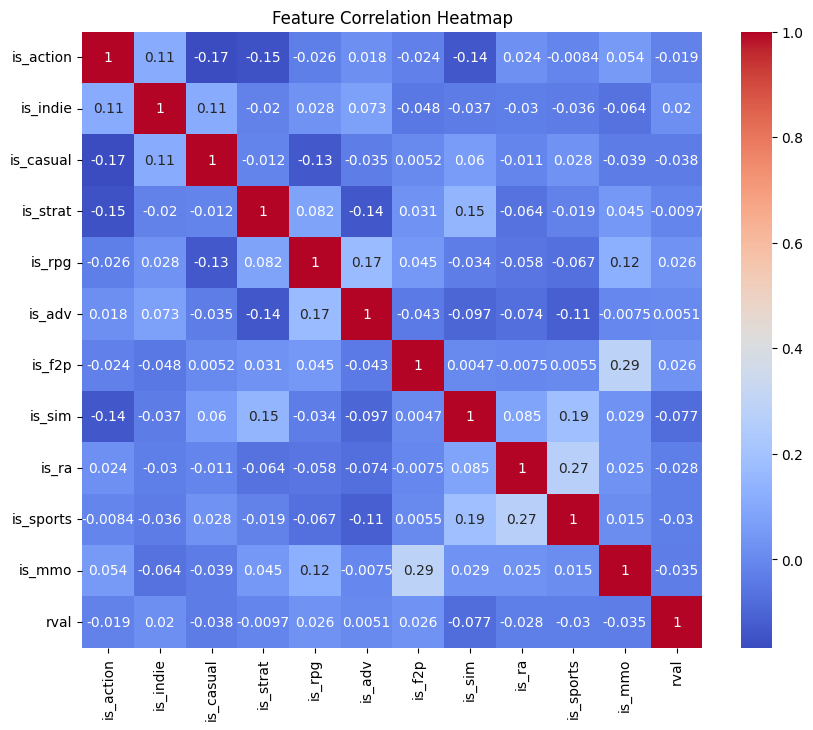

In [275]:
plt.figure(figsize=(10, 8))
sns.heatmap(ds.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

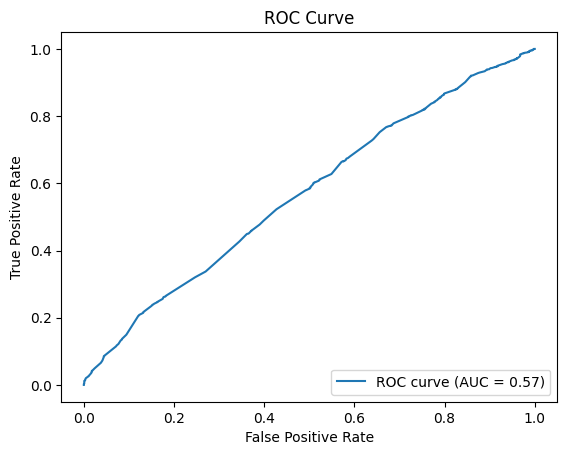

In [285]:
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
aucs = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {aucs:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

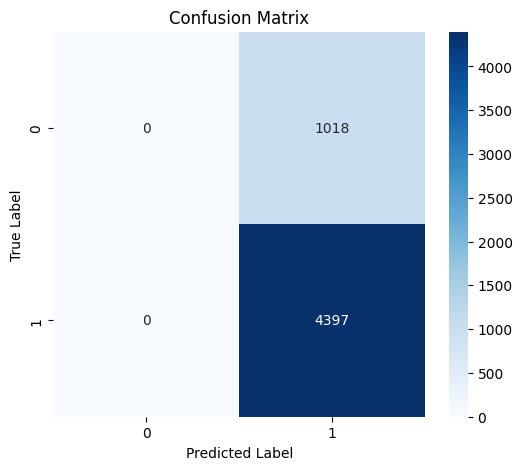

In [277]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#Analysis using Random Forest Classifier

Random Forest Classifier was chosen because the dataset is binary , and the target variable 'rval' is also binary. Random Forest is apt for binary classification tasks, as it performs well with both categorical and numerical data. Random Forest is also known to produce good results in a feature complex dataset and solves fitting problems. I split the dataset into 80% for training and 20% for testing. This ensures that the model generalizes well and doesn't overfit to the training data. The random forest model was initialized with 100 estimators. It is also viable to have the estimators be a list and cycling through them to test.


In [278]:

X = ds.drop('rval', axis=1)
y = ds['rval']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[  13 1005]
 [  36 4361]]

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.01      0.02      1018
           1       0.81      0.99      0.89      4397

    accuracy                           0.81      5415
   macro avg       0.54      0.50      0.46      5415
weighted avg       0.71      0.81      0.73      5415


Accuracy: 0.8077562326869806


After analysis we got a rather realistic Confusion Matrix. The accuracy is around 80% but the precision and recall values leave a lot to be desired. It is still a step up from really abnormal value obtained when using logistic regression.

Higher AUC indicates a really good model here we have an auc of 0.59. Which put it in the lower ballpark than whats desirable normally.

RF Classifier boasts an adavantage of being really good at feature importance identification and we got a solid chart that helps us identify the genre that by being present would increase the odds of a positive rating.

Random Forest allowed the model to learn complex interactions between features without explicitly modeling these relationships. This is especially valuable when there are nonlinear relationships between the features and the target variable.

Before we fully conclude let's take a look at the XGBoost algorithm as well

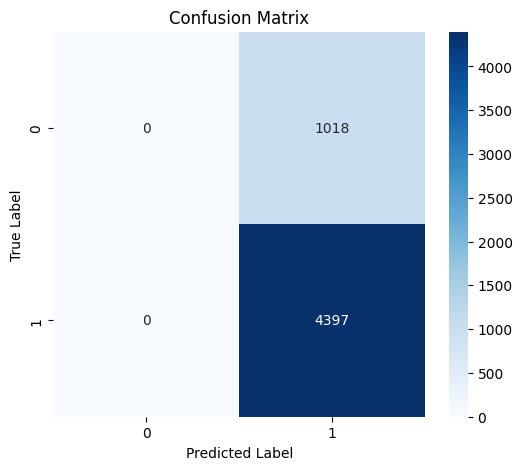

In [286]:

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=[0,1],yticklabels=[0,1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

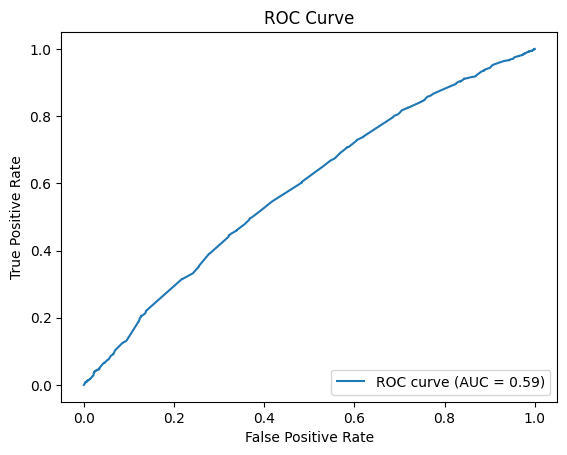

In [280]:
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
aucs = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {aucs:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

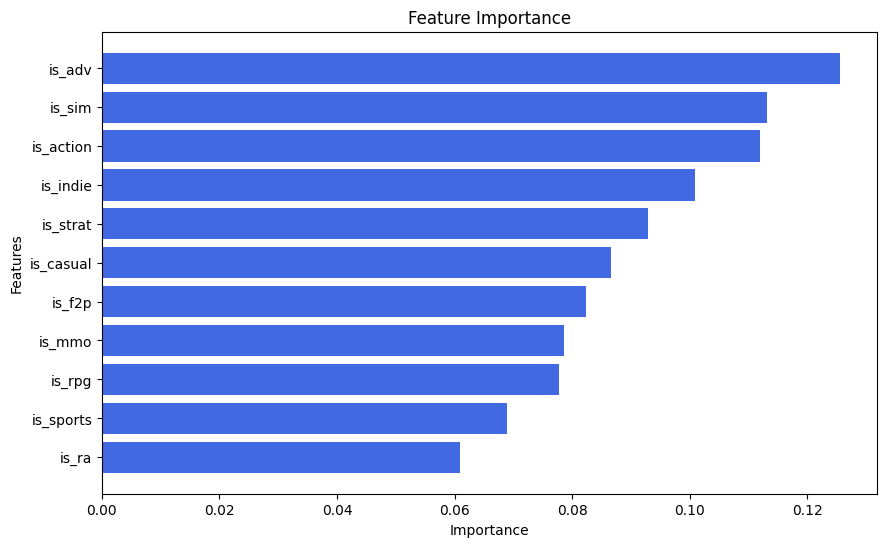

In [281]:
i = rf_classifier.feature_importances_

features = X.columns
sarr = np.argsort(i)
plt.figure(figsize=(10, 6))
plt.barh(features[sarr], i[sarr], color='royalblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

#Analysis using XGBoost

As the dataset is binary and the target variable is as well, XGBoost is really well suited for this kind of problems. XGBoost also boasts the capability to process very large datasets and train them efficiently. Generally XGBoost outperforms other models in classification and is really popular because of it.

A similar split was used to get the training data for the model like it was done for Random Forest.

Further analysis was doen with the help of visualizations.

In [287]:
X = ds.drop('rval', axis=1)
y = ds['rval']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_class = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgb_class.fit(X_train, y_train)

y_pred = xgb_class.predict(X_test)

accuracy_score(y_test, y_pred)
print(f"Accuracy:",accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:30:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8090489381348107
              precision    recall  f1-score   support

           0       0.37      0.02      0.04      1018
           1       0.81      0.99      0.89      4397

    accuracy                           0.81      5415
   macro avg       0.59      0.51      0.47      5415
weighted avg       0.73      0.81      0.73      5415



After analysis we got a Confusion Matrix similar to the previous one. The accuracy is around 80% but the precision and recall values leave a lot to be desired. But they are noticeably higher than the one of RF Classifier due to the nature of XGB.

Higher AUC indicates a really good model here we have an auc of 0.59. Which put it in the lower ballpark than whats desirable normally.

The feature identification was really good similar to RFC but a slightly different result was obtained but it was a consistent top feature prediction for both models

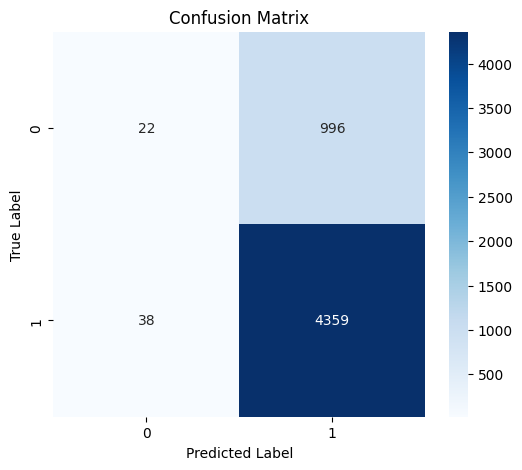

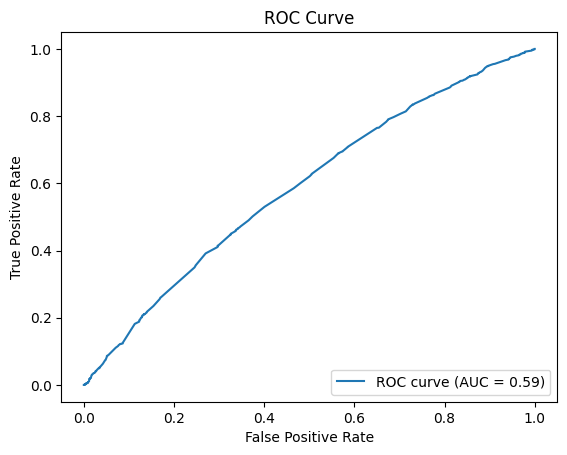

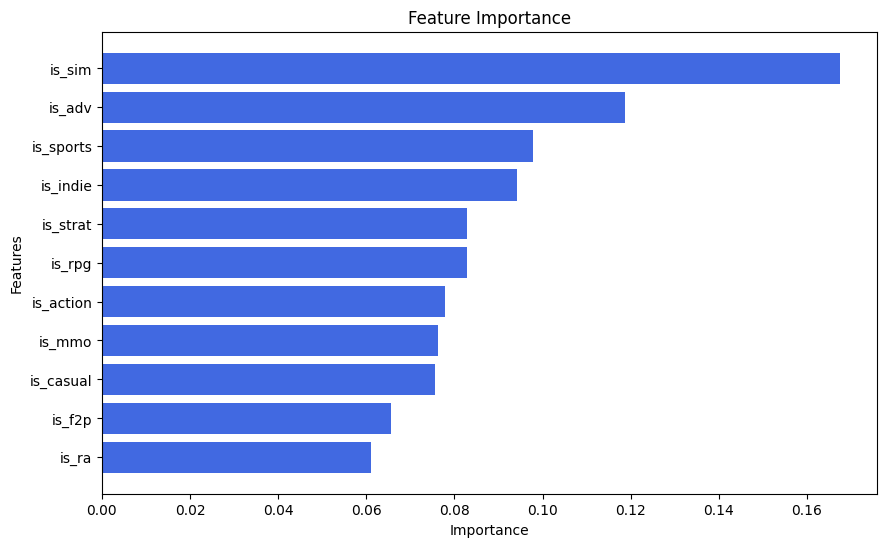

In [283]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=[0,1],yticklabels=[0,1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

y_pred_proba = xgb_class.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
aucs = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {aucs:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

i = xgb_class.feature_importances_

features = X.columns
sarr = np.argsort(i)
plt.figure(figsize=(10, 6))
plt.barh(features[sarr], i[sarr], color='royalblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

#Final Conclusion

We can conclude the best algorithm to proceed for this model would be XGBoost hands down. But the problems of low recall and precision values need to be addressed in the future. Currently no amount of hyperparameter tuning would provide us desirably better results as they are not caused by the model's inefficacy. After probing it was found out that the features might be insufficient to provide an answer for this problem accurately. This could be solved by combining XGB with other algorithms and adding more varied features that might help in identifying hidden relationships. As of now the target variable and relationship to the features isn't consistent enough to be able to predict.